In [1]:
import numpy as np
import pandas as pd
from birdy import WPSClient
from keras import models
from IPython.display import Image

2025-05-12 14:06:56.501719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
url = "http://localhost:5008/wps"
# url = "https://shearwater.copernicus-climate.eu/wps"

wps = WPSClient(url, verify=False)
help(wps)

Help on WPSClient in module birdy.client.base:

<birdy.client.base.WPSClient object>
    A WPS for tropical cyclone activity forecasting.
    
    Processes
    ---------
    
    cyclone
        A process to forecast tropical cyclone activity in tropical ocean basins up to 15 days ahead.



In [3]:
resp = wps.cyclone(init_date="2024-07-03", leadtime="0-48 h", region="North Atlantic")
print(resp)

In [4]:
resp.get()

cycloneResponse(
    output_csv='http://localhost:5008/outputs/9b0e3734-2f29-11f0-b902-080038c02de1/tcactivity_48_17_20240703_lag0_Natlantic.csv',
    output_png='http://localhost:5008/outputs/9b0e3734-2f29-11f0-b902-080038c02de1/tcactivity_48_17_20240703_lag0_Natlantic.1.png'
)

In [5]:
result_url = resp.get()[0]
df = pd.read_csv(result_url)
df

,Unnamed: 0,latitude,longitude,time,predictions_lag0
0,0,40.0,-90.0,2024-07-03,0.000159
1,1,40.0,-87.5,2024-07-03,0.000051
2,2,40.0,-85.0,2024-07-03,0.000059
3,3,40.0,-82.5,2024-07-03,0.000053
4,4,40.0,-80.0,2024-07-03,0.000105
...,...,...,...,...,...
372,372,10.0,-30.0,2024-07-03,0.000835
373,373,10.0,-27.5,2024-07-03,0.000646
374,374,10.0,-25.0,2024-07-03,0.000379
375,375,10.0,-22.5,2024-07-03,0.000942


In [6]:
result_url = resp.get()[1]

In [7]:
! wget $result_url -P /home/b/b382611/shearwater

--2025-05-12 14:07:15--  http://localhost:5008/outputs/9b0e3734-2f29-11f0-b902-080038c02de1/tcactivity_48_17_20240703_lag0_Natlantic.1.png
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:5008... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:5008... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65680 (64K) [image/png]
Saving to: ‘/home/b/b382611/shearwater/tcactivity_48_17_20240703_lag0_Natlantic.1.png’

tcactivity_48_17_20 100%[===================>]  64.14K  --.-KB/s    in 0.002s  

2025-05-12 14:07:15 (38.0 MB/s) - ‘/home/b/b382611/shearwater/tcactivity_48_17_20240703_lag0_Natlantic.1.png’ saved [65680/65680]



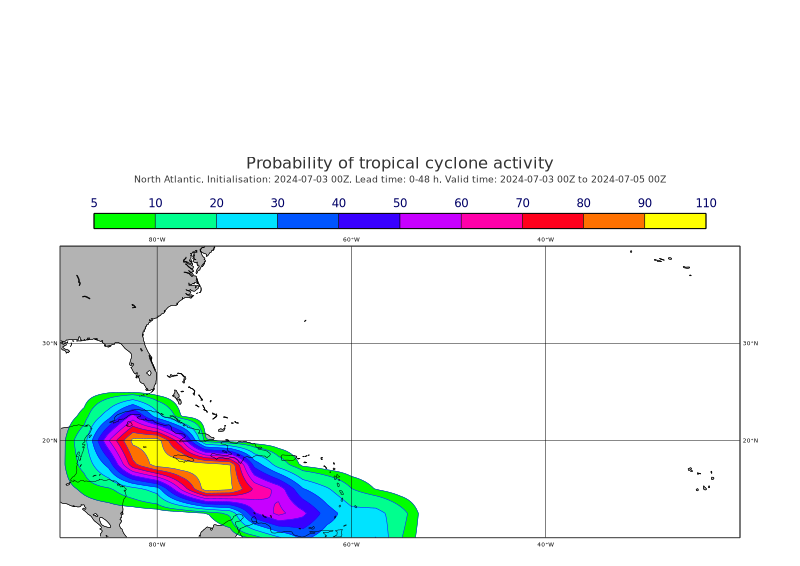

In [8]:
Image(result_url)